In [26]:
from prevelop import preparation, exploration, clustering, evaluation
from collections import Counter
import matplotlib.pyplot as plt

__Data Preparation and Preprocessing__

In [48]:
### Load the data (IM-KI)
# Load the cad-data
cad_data = preparation.load_data(r"C:\Users\IM-KI\Documents\PrEvelOp_Daten_Römheld\Römheld_cad.xlsx")
# load process-data
process_data = preparation.load_data(r"C:\Users\IM-KI\Documents\PrEvelOp_Daten_Römheld\Römheld_prozess_2.xlsx")
# load link data
link_data = preparation.load_data(r"C:\Users\IM-KI\Documents\PrEvelOp_Daten_Römheld\Römheld_teile_zeichnung.xlsx")

In [28]:
### Load the data (Mac)
# Load the cad-data
cad_data = preparation.load_data(r"/Users/kaspar/Documents/FIR/Prevelop/Roemheld/Römheld_cad.xlsx")
# load process-data
process_data = preparation.load_data(r"/Users/kaspar/Documents/FIR/Prevelop/Roemheld/Römheld_prozess.xlsx")
# load link data
link_data = preparation.load_data(r"/Users/kaspar/Documents/FIR/Prevelop/Roemheld/Römheld_teile_zeichnungen.xlsx")

In [29]:
cad_data

,Key,Klasse,Volumen [mm3],Masse [kg],Flächeninhalt [mm2],L [mm],B [mm],H [mm],Lrot [mm],Da max. [mm],Di min. [mm]
0,3128-280-V10-CAM,RND_008,"21122,01 mm3","0,166 kg","20539,7 mm2","230,00 mm","16,66 mm","16,66 mm","230,00 mm","16,66 mm","12,50 mm"
1,3412-946_0-V10-CAM,RND_011,"2445,25 mm3","0,019 kg","2202,2 mm2","30,00 mm","17,00 mm","17,00 mm","30,00 mm","17,00 mm","6,50 mm"
2,3420-613-V10-CAM,RND_008,"757,54 mm3","0,006 kg","770,2 mm2","20,00 mm","20,00 mm","3,80 mm","3,80 mm","20,00 mm","9,00 mm"
3,3468-000_A-PFA-CAM,RND_010,"126976,50 mm3","0,990 kg","32393,5 mm2","81,50 mm","60,00 mm","60,00 mm","81,50 mm","60,00 mm","32,00 mm"
4,3468-030_0-PFA-CAM,RND_010,"244025,92 mm3","1,916 kg","44537,8 mm2","81,00 mm","80,00 mm","80,00 mm","81,00 mm","80,00 mm","40,00 mm"
5,3468-032_A-PFA-CAM,RND_010,"106636,19 mm3","0,832 kg","28195,0 mm2","68,50 mm","60,00 mm","60,00 mm","68,50 mm","60,00 mm","32,00 mm"
6,3468-049_A-PFA-CAM,RND_010,"274594,87 mm3","2,156 kg","48709,8 mm2","91,00 mm","80,00 mm","80,00 mm","91,00 mm","80,00 mm","40,00 mm"
7,3468-069_A-PFA-CAM,RND_010,"304484,27 mm3","2,396 kg","55952,2 mm2","90,00 mm","90,00 mm","89,00 mm","89,00 mm","90,00 mm","50,00 mm"
8,3468-071_A-PFA-CAM,RND_010,"346582,51 mm3","2,728 kg","62315,2 mm2","102,00 mm","90,00 mm","90,00 mm","102,00 mm","90,00 mm","50,00 mm"
9,3468-206_A-PFA-CAM,RND_010,"60540,48 mm3","0,472 kg","17002,2 mm2","58,00 mm","45,00 mm","45,00 mm","58,00 mm","45,00 mm","20,00 mm"


In [30]:
process_data

,Teil,POSITIONS_NR,BELEGUNGSEINHEIT_NR,RUESTZEIT,ZEIT_JE_EINHEIT,VORLAUFZEIT
0,3128280,10,66300,5.000,1.00,1.00
1,3412946,10,64102,32.000,1.65,0.00
2,3412946,20,63205,5.000,1.00,0.34
3,3412946,30,63203,1.000,0.01,0.50
4,3412946,40,99999,0.001,0.00,0.00
...,...,...,...,...,...,...
329,520100768,80,99999,0.001,0.00,0.00
330,520100768,90,96501,35.000,0.01,2.44
331,520100768,100,5725,0.000,0.00,2.52
332,6305954,10,68200,5.000,15.00,0.00


In [31]:
### clear data
# for cad-data received from SIMUS, apply the following cleaning steps
cad_data = preparation.clear_cad_data(cad_data)

In [32]:
### select the data
cad_data, process_data, link_data = preparation.select_data(cad_data, process_data, link_data, 'Zeichnung', 'Teil')

In [33]:
# fill nan values with 0
cad_data = cad_data.fillna(0)

In [34]:
# clean process data
# delete all rows with value 99999 in column 'BELEGUNGSEINHEIT_NR'
process_data = process_data[process_data['BELEGUNGSEINHEIT_NR'] != 99999]

In [35]:
### aggregate process data
# create a new dataframe to store the aggregated data
process_data_2 = link_data.copy()
teile_list = process_data_2['Teil'].tolist()

nr_positionen = []
belegungseinheiten = []
ruestzeit = []
vorlaufzeit = []

for teil in teile_list:
    teil_data = process_data[process_data['Teil'] == teil]
    # drop duplicates in teil_data on AkvP
    teil_data.drop_duplicates(subset=['POSITIONS_NR'], inplace=True)
    nr_positionen.append(teil_data.shape[0])
    belegungseinheiten.append(teil_data['BELEGUNGSEINHEIT_NR'].tolist())
    ruestzeit.append(teil_data['ZEIT_JE_EINHEIT'].sum())
    vorlaufzeit.append(teil_data['VORLAUFZEIT'].sum())

# save aggregated data in the new dataframe
process_data_2['Anzahl_Positionen'] = nr_positionen
process_data_2['Belegungseinheiten'] = belegungseinheiten
process_data_2['Ruestzeit'] = ruestzeit
process_data_2['Vorlaufzeit'] = vorlaufzeit

In [36]:
# select all belegungseinheiten unique
belegungseinheiten = list(set([item for sublist in belegungseinheiten for item in sublist]))
# add a column for each belegungseinheit in belegungseinheiten
# add 1 if the activitiy appears in the process of the respective row, 0 otherwise
for belegungseinheit in belegungseinheiten:
    column_values = [1 if belegungseinheit in process else 0 for process in process_data_2['Belegungseinheiten']]
    process_data_2['Belegungseinheit ' + str(belegungseinheit)] = column_values

# drop the column'Belegungseinheiten'
process_data_2.drop(columns=['Belegungseinheiten'], inplace=True)

In [37]:
### merge the data
data = preparation.merge_data(cad_data, process_data_2, 'Zeichnung', 'Teil')

In [38]:
data

,Anzahl_Positionen,Ruestzeit,Vorlaufzeit,Belegungseinheit 63105,Belegungseinheit 63503,Belegungseinheit 62101,Belegungseinheit 62501,Belegungseinheit 62505,Belegungseinheit 62506,Belegungseinheit 6195,...,Klasse,Volumen [mm3],Masse [kg],Flächeninhalt [mm2],L [mm],B [mm],H [mm],Lrot [mm],Da max. [mm],Di min. [mm]
Teil,,,,,,,,,,,,,,,,,,,,,
510101093,9,30.490,14.86,0,1,0,0,0,0,0,...,RND_005,73719.46,0.580,17252.8,88.50,54.00,54.00,88.5,54.00,0.0
510100990,9,23.320,13.96,0,1,0,0,0,0,0,...,RND_005,8088.26,0.064,3655.3,59.00,16.00,16.00,59.0,16.00,0.0
503200048,6,9.980,7.02,0,0,0,0,0,0,0,...,RND_005,29871.96,0.234,9415.2,142.00,18.00,18.00,142.0,18.00,0.0
503200035,6,15.740,7.52,0,0,0,0,0,0,0,...,RND_006,14848.00,0.117,5971.0,117.00,14.00,14.00,117.0,14.00,0.0
503200034,6,16.640,7.57,0,0,0,0,0,0,0,...,OTHERASSEM,488550.81,3.845,180774.7,595.00,430.00,50.00,0.0,0.00,0.0
3790011,2,0.010,2.00,0,0,0,0,0,0,1,...,OTHR_004,6762.51,0.053,5557.1,27.95,24.75,24.75,0.0,0.00,0.0
3682002,1,1.200,1.00,0,0,0,0,0,0,0,...,RND_008,5654.87,0.045,11366.3,200.00,10.00,10.00,200.0,10.00,8.0
3681000,1,2.000,1.00,0,0,0,0,0,0,0,...,RND_008,9401.35,0.074,5824.9,60.00,21.00,21.00,60.0,21.00,14.0
3680817,1,1.000,1.00,0,0,0,0,0,0,0,...,RNDASSEMBLY,6597.34,0.052,13282.6,170.00,8.00,8.00,170.0,8.00,6.0


In [39]:
### preprocess the data
# select numerical, binary and categorical columns for preprocessing
num_colums = ['L [mm]', 'B [mm]', 'H [mm]', 'Ruestzeit', 'Vorlaufzeit', 'Anzahl_Positionen', 'Volumen [mm3]', 'Masse [kg]', 'Flächeninhalt [mm2]', 'Da max. [mm]', 'Di min. [mm]']
cat_columns = ['Klasse']
bin_columns = ['Belegungseinheit ' + str(belegungseinheit) for belegungseinheiten in belegungseinheiten]

data_preprocessed = preparation.preprocessing(data, num_colums, bin_columns, cat_columns)

__Exploration__

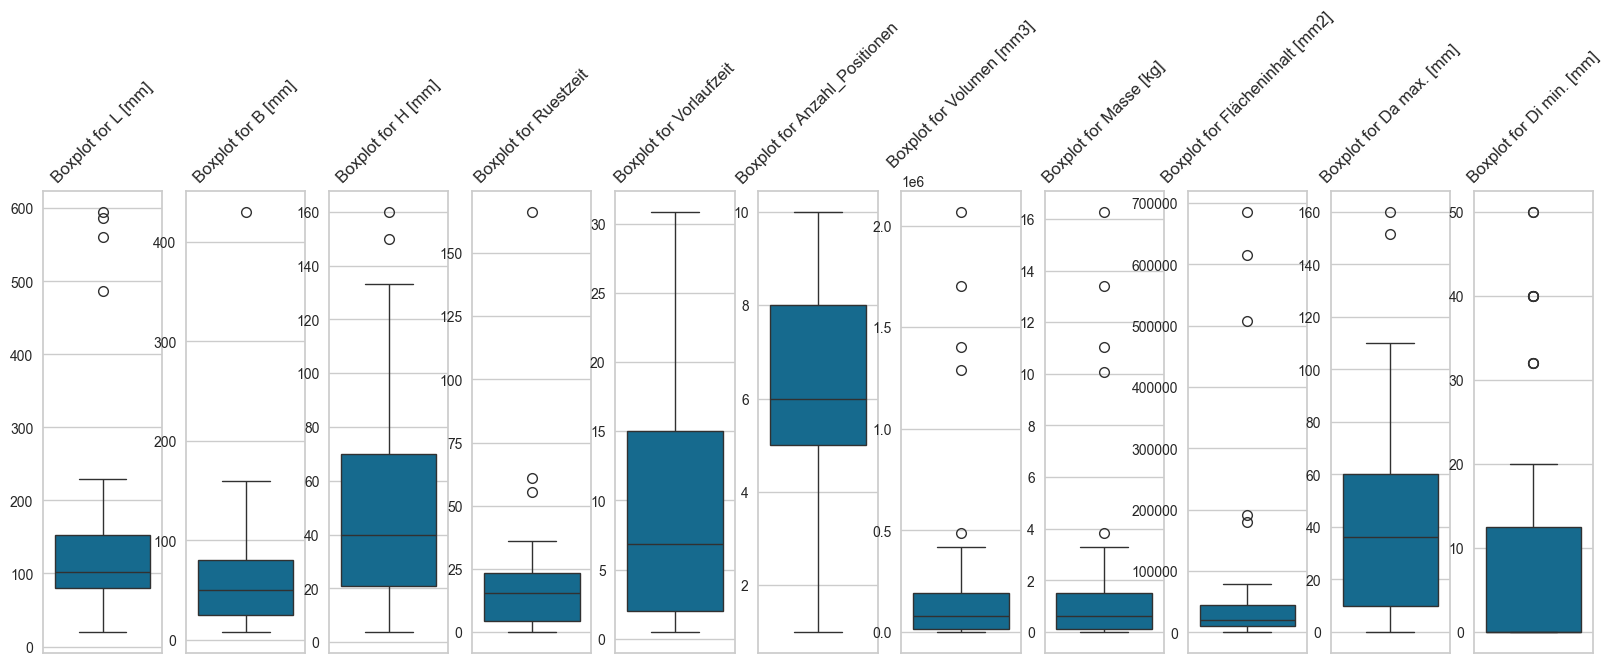

In [40]:
# show boxplots of the numerical columns
exploration.boxplots(data, num_colums)

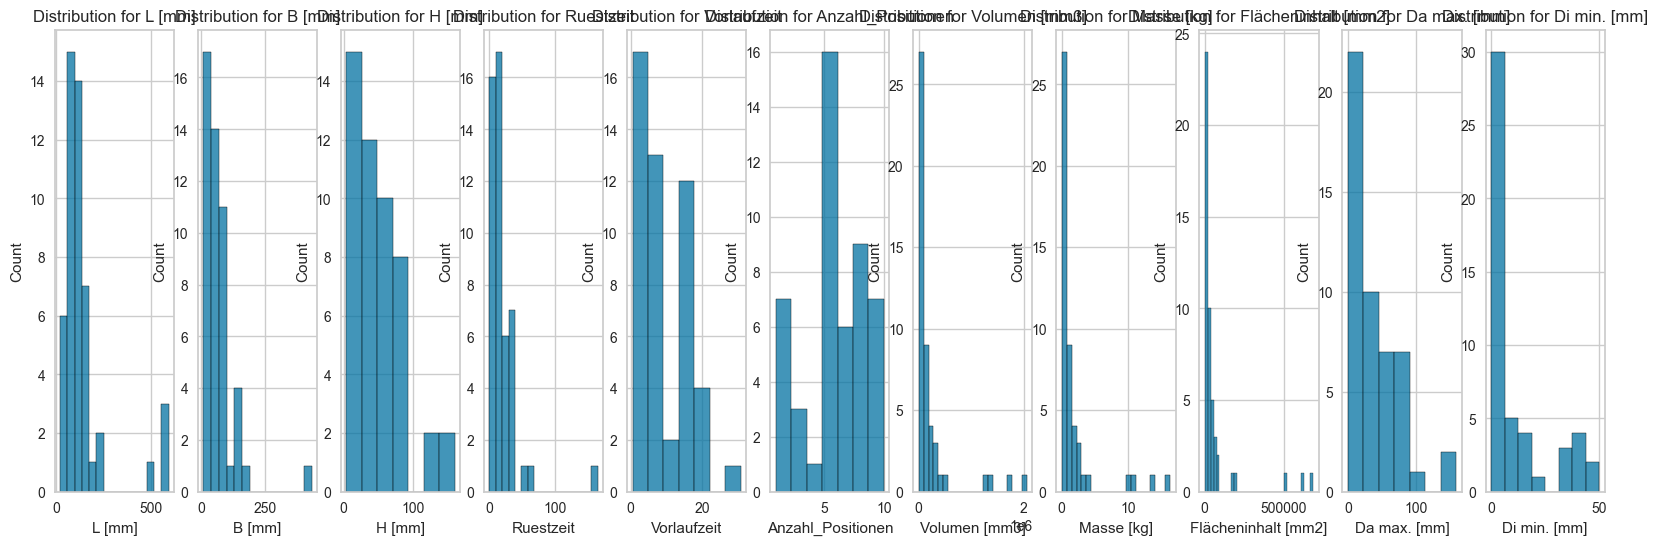

In [41]:
# show histograms of categorical columns
exploration.distribution(data, num_colums)

__Clustering__

In [42]:
### calculate distance matrix
distance_matrix = clustering.gower_distance(data)

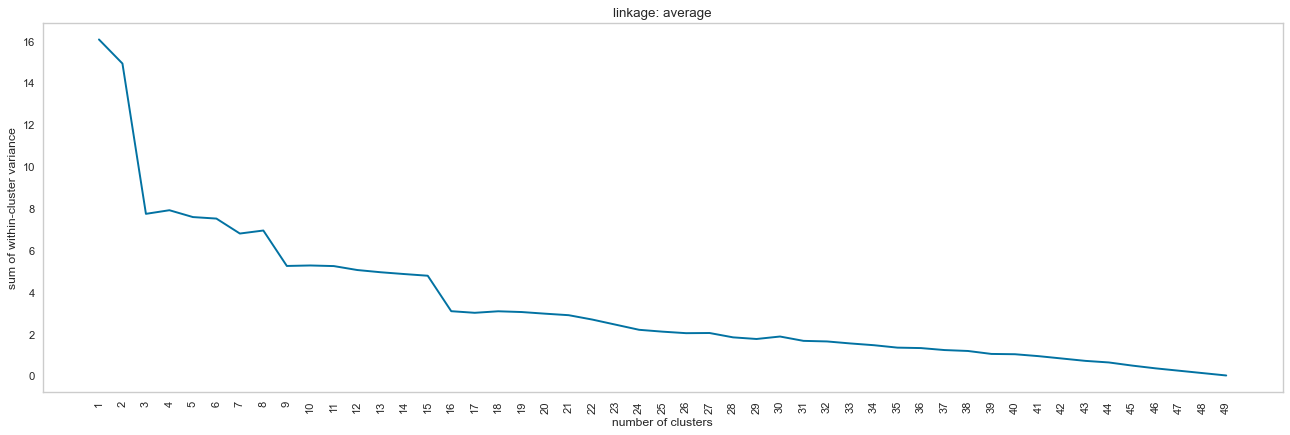

In [51]:
### plot the elbow plot for the first 20 clusters
clustering.elbow_plot(data_preprocessed, distance_matrix, 50)

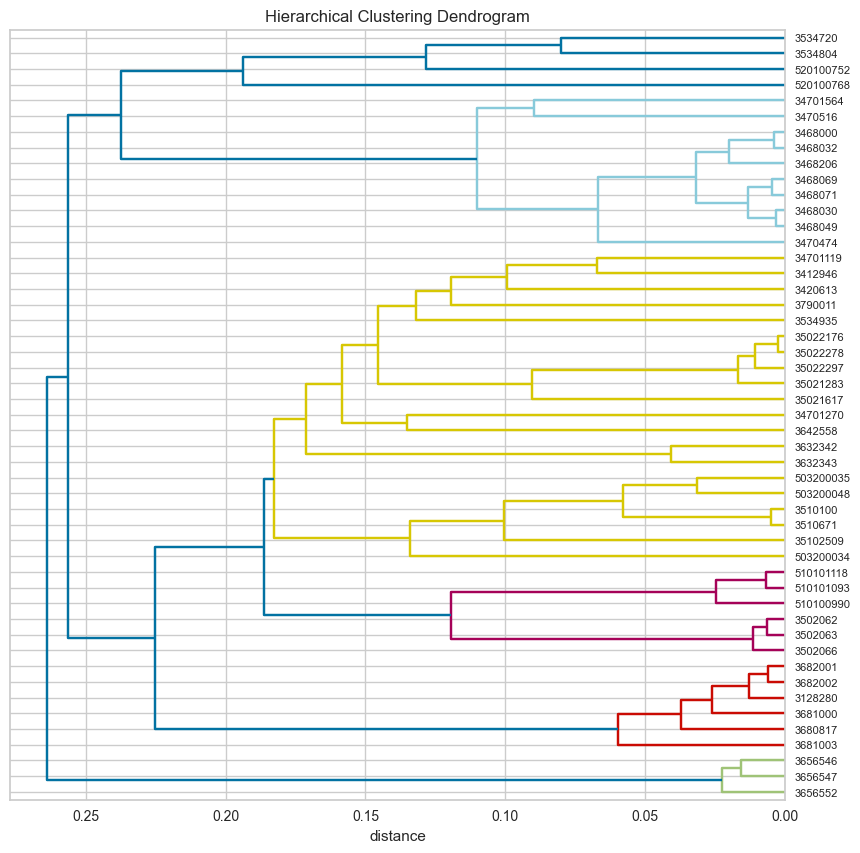

In [44]:
### plot the dendrogram
clustering.plot_dendrogram(distance_matrix, labels=data.index, orientation='left')

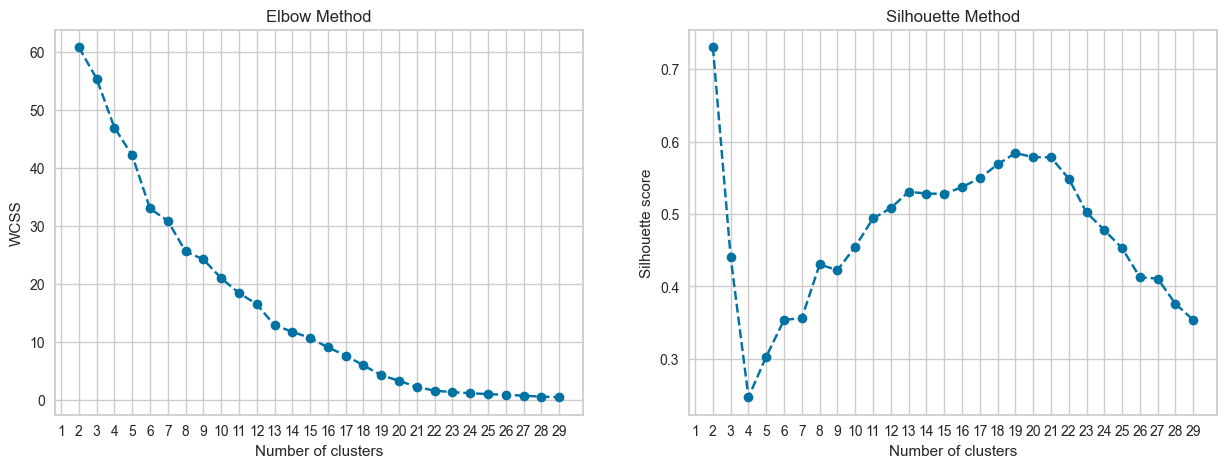

In [45]:
### find clusters with k-medoids and apply elbow and shilouette method
clustering.find_clusters_kmedoids(data_preprocessed, 30)

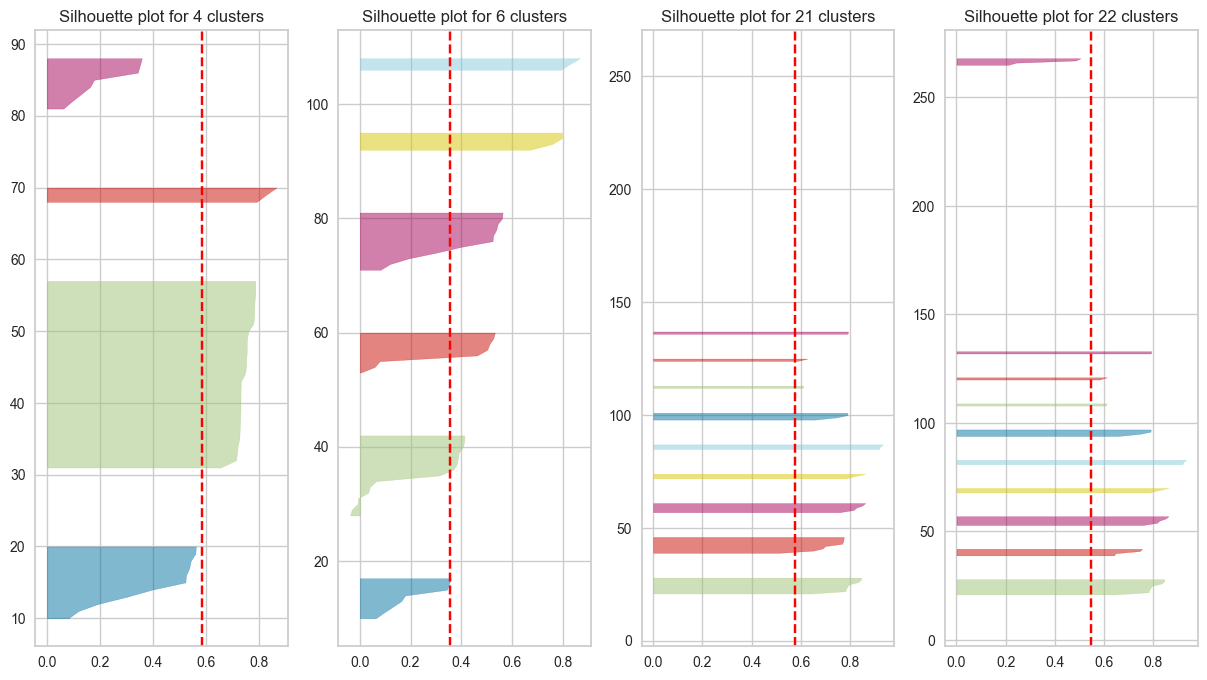

In [46]:
clustering.silhouette_plot(data_preprocessed, [4,6,21,22])

In [47]:
### apply agglomerative clustering
k=16
clusters = clustering.agglomerative_clustering(distance_matrix, k)
### print the data per cluster
for cluster in range(k):
    print('Cluster: ', cluster)
    print(display(data[clusters == cluster]))

Cluster:  0


,Anzahl_Positionen,Ruestzeit,Vorlaufzeit,Belegungseinheit 63105,Belegungseinheit 63503,Belegungseinheit 62101,Belegungseinheit 62501,Belegungseinheit 62505,Belegungseinheit 62506,Belegungseinheit 6195,...,Klasse,Volumen [mm3],Masse [kg],Flächeninhalt [mm2],L [mm],B [mm],H [mm],Lrot [mm],Da max. [mm],Di min. [mm]
Teil,,,,,,,,,,,,,,,,,,,,,
3790011,2,0.010,2.00,0,0,0,0,0,0,1,...,OTHR_004,6762.51,0.053,5557.1,27.95,24.75,24.75,0.0,0.0,0.0
3412946,4,2.670,1.38,0,0,0,0,0,0,0,...,RND_011,2445.25,0.019,2202.2,30.00,17.00,17.00,30.0,17.0,6.5
34701119,3,1.020,1.08,0,0,0,0,0,0,0,...,OTHERASSEM,45043.36,0.354,30556.0,60.00,39.00,29.00,0.0,0.0,0.0
3420613,3,0.026,0.70,0,0,0,0,0,0,0,...,RND_008,757.54,0.006,770.2,20.00,20.00,3.80,3.8,20.0,9.0


None
Cluster:  1


,Anzahl_Positionen,Ruestzeit,Vorlaufzeit,Belegungseinheit 63105,Belegungseinheit 63503,Belegungseinheit 62101,Belegungseinheit 62501,Belegungseinheit 62505,Belegungseinheit 62506,Belegungseinheit 6195,...,Klasse,Volumen [mm3],Masse [kg],Flächeninhalt [mm2],L [mm],B [mm],H [mm],Lrot [mm],Da max. [mm],Di min. [mm]
Teil,,,,,,,,,,,,,,,,,,,,,
3470516,10,60.97,30.85,1,0,0,0,0,0,0,...,RND_011,349138.09,2.723,63368.3,110.0,85.0,81.0,81.0,151.43,40.0
3470474,7,20.52,21.74,0,0,0,0,0,0,0,...,RND_010,23884.52,0.187,10807.6,68.5,36.0,32.0,68.5,36.00,10.0
34701564,8,33.82,17.70,0,0,0,0,0,0,0,...,RND_011,167503.36,1.318,42241.6,80.0,72.5,63.0,72.5,110.11,32.0
3468206,8,17.37,15.00,0,0,0,0,0,0,0,...,RND_010,60540.48,0.472,17002.2,58.0,45.0,45.0,58.0,45.00,20.0
3468071,8,36.07,15.80,0,0,0,0,0,0,0,...,RND_010,346582.51,2.728,62315.2,102.0,90.0,90.0,102.0,90.00,50.0
3468069,8,32.56,16.82,0,0,0,0,0,0,0,...,RND_010,304484.27,2.396,55952.2,90.0,90.0,89.0,89.0,90.00,50.0
3468049,8,30.97,17.70,0,0,0,0,0,0,0,...,RND_010,274594.87,2.156,48709.8,91.0,80.0,80.0,91.0,80.00,40.0
3468032,8,21.92,20.36,0,0,0,0,0,0,0,...,RND_010,106636.19,0.832,28195.0,68.5,60.0,60.0,68.5,60.00,32.0
3468030,8,31.03,16.72,0,0,0,0,0,0,0,...,RND_010,244025.92,1.916,44537.8,81.0,80.0,80.0,81.0,80.00,40.0


None
Cluster:  2


,Anzahl_Positionen,Ruestzeit,Vorlaufzeit,Belegungseinheit 63105,Belegungseinheit 63503,Belegungseinheit 62101,Belegungseinheit 62501,Belegungseinheit 62505,Belegungseinheit 62506,Belegungseinheit 6195,...,Klasse,Volumen [mm3],Masse [kg],Flächeninhalt [mm2],L [mm],B [mm],H [mm],Lrot [mm],Da max. [mm],Di min. [mm]
Teil,,,,,,,,,,,,,,,,,,,,,
3534804,8,16.420,3.18,0,0,1,0,0,0,0,...,OTHR_005,155035.53,1.217,35869.8,100.0,80.0,31.0,0.0,0.0,0.0
3534720,9,23.854,4.75,1,0,1,0,0,0,0,...,RNDASSEMBLY,199809.96,1.573,45268.9,125.0,100.0,30.0,30.0,87.0,12.5


None
Cluster:  3


,Anzahl_Positionen,Ruestzeit,Vorlaufzeit,Belegungseinheit 63105,Belegungseinheit 63503,Belegungseinheit 62101,Belegungseinheit 62501,Belegungseinheit 62505,Belegungseinheit 62506,Belegungseinheit 6195,...,Klasse,Volumen [mm3],Masse [kg],Flächeninhalt [mm2],L [mm],B [mm],H [mm],Lrot [mm],Da max. [mm],Di min. [mm]
Teil,,,,,,,,,,,,,,,,,,,,,
503200048,6,9.980,7.02,0,0,0,0,0,0,0,...,RND_005,29871.96,0.234,9415.2,142.0,18.0,18.0,142.0,18.0,0.0
503200035,6,15.740,7.52,0,0,0,0,0,0,0,...,RND_006,14848.00,0.117,5971.0,117.0,14.0,14.0,117.0,14.0,0.0
3510671,5,4.129,6.85,0,0,0,0,0,0,0,...,RND_004,7842.99,0.062,3560.4,106.5,10.0,10.0,106.5,10.0,0.0
35102509,5,5.480,1.63,0,0,0,0,0,0,0,...,RND_004,13607.51,0.107,4563.0,41.5,36.0,36.0,41.5,36.0,0.0
3510100,5,4.330,6.85,0,0,0,0,0,0,0,...,RND_004,14341.75,0.113,5315.7,133.0,12.0,12.0,133.0,12.0,0.0


None
Cluster:  4


,Anzahl_Positionen,Ruestzeit,Vorlaufzeit,Belegungseinheit 63105,Belegungseinheit 63503,Belegungseinheit 62101,Belegungseinheit 62501,Belegungseinheit 62505,Belegungseinheit 62506,Belegungseinheit 6195,...,Klasse,Volumen [mm3],Masse [kg],Flächeninhalt [mm2],L [mm],B [mm],H [mm],Lrot [mm],Da max. [mm],Di min. [mm]
Teil,,,,,,,,,,,,,,,,,,,,,
35022297,5,11.190,6.87,0,0,0,0,0,0,0,...,RND_004,21406.34,0.168,7812.0,79.5,25.0,25.0,79.5,25.0,0.0
35022278,5,10.570,6.69,0,0,0,0,0,0,0,...,RND_004,68791.29,0.541,15348.9,97.0,40.0,40.0,97.0,40.0,0.0
35022176,5,9.670,6.79,0,0,0,0,0,0,0,...,RND_004,79786.09,0.628,16382.2,110.0,40.0,40.0,110.0,40.0,0.0
35021617,5,11.607,1.95,0,0,0,0,0,0,0,...,RND_006,79065.79,0.622,15592.7,159.0,36.0,36.0,159.0,36.0,0.0
35021283,6,13.222,8.81,0,0,0,0,0,0,0,...,RND_004,139030.61,1.091,24303.2,125.0,50.0,50.0,125.0,50.0,0.0


None
Cluster:  5


,Anzahl_Positionen,Ruestzeit,Vorlaufzeit,Belegungseinheit 63105,Belegungseinheit 63503,Belegungseinheit 62101,Belegungseinheit 62501,Belegungseinheit 62505,Belegungseinheit 62506,Belegungseinheit 6195,...,Klasse,Volumen [mm3],Masse [kg],Flächeninhalt [mm2],L [mm],B [mm],H [mm],Lrot [mm],Da max. [mm],Di min. [mm]
Teil,,,,,,,,,,,,,,,,,,,,,
3642558,5,11.92,15.02,0,0,0,0,1,0,0,...,BLCK_001,420981.83,3.313,79271.3,100.0,90.0,75.0,0.0,0.0,0.0


None
Cluster:  6


,Anzahl_Positionen,Ruestzeit,Vorlaufzeit,Belegungseinheit 63105,Belegungseinheit 63503,Belegungseinheit 62101,Belegungseinheit 62501,Belegungseinheit 62505,Belegungseinheit 62506,Belegungseinheit 6195,...,Klasse,Volumen [mm3],Masse [kg],Flächeninhalt [mm2],L [mm],B [mm],H [mm],Lrot [mm],Da max. [mm],Di min. [mm]
Teil,,,,,,,,,,,,,,,,,,,,,
510101093,9,30.490,14.86,0,1,0,0,0,0,0,...,RND_005,73719.46,0.580,17252.8,88.5,54.0,54.0,88.5,54.0,0.0
510100990,9,23.320,13.96,0,1,0,0,0,0,0,...,RND_005,8088.26,0.064,3655.3,59.0,16.0,16.0,59.0,16.0,0.0
510101118,9,30.752,14.02,0,1,0,0,0,0,0,...,RND_005,95622.71,0.753,22952.0,124.5,54.0,54.0,124.5,54.0,0.0


None
Cluster:  7


,Anzahl_Positionen,Ruestzeit,Vorlaufzeit,Belegungseinheit 63105,Belegungseinheit 63503,Belegungseinheit 62101,Belegungseinheit 62501,Belegungseinheit 62505,Belegungseinheit 62506,Belegungseinheit 6195,...,Klasse,Volumen [mm3],Masse [kg],Flächeninhalt [mm2],L [mm],B [mm],H [mm],Lrot [mm],Da max. [mm],Di min. [mm]
Teil,,,,,,,,,,,,,,,,,,,,,
3656552,6,16.42,5.73,0,0,0,0,0,1,0,...,OTHR_006,2067654.99,16.272,685802.1,560.0,150.0,150.0,0.0,0.0,0.0
3656547,6,15.42,6.15,0,0,0,0,0,1,0,...,OTHR_006,1705082.50,13.419,615003.6,587.0,133.0,133.0,0.0,0.0,0.0
3656546,6,15.42,5.59,0,0,0,0,0,1,0,...,OTHR_006,1404514.91,11.054,508158.1,487.0,133.0,133.0,0.0,0.0,0.0


None
Cluster:  8


,Anzahl_Positionen,Ruestzeit,Vorlaufzeit,Belegungseinheit 63105,Belegungseinheit 63503,Belegungseinheit 62101,Belegungseinheit 62501,Belegungseinheit 62505,Belegungseinheit 62506,Belegungseinheit 6195,...,Klasse,Volumen [mm3],Masse [kg],Flächeninhalt [mm2],L [mm],B [mm],H [mm],Lrot [mm],Da max. [mm],Di min. [mm]
Teil,,,,,,,,,,,,,,,,,,,,,
3632343,7,18.07,2.72,0,0,0,0,1,0,0,...,RND_004,95263.97,0.750,21549.6,57.0,50.0,50.0,57.0,61.0,0.0
3632342,7,25.22,3.76,0,0,0,0,1,0,0,...,RND_009,120487.58,0.948,27209.3,80.0,61.0,61.0,80.0,61.0,16.3


None
Cluster:  9


,Anzahl_Positionen,Ruestzeit,Vorlaufzeit,Belegungseinheit 63105,Belegungseinheit 63503,Belegungseinheit 62101,Belegungseinheit 62501,Belegungseinheit 62505,Belegungseinheit 62506,Belegungseinheit 6195,...,Klasse,Volumen [mm3],Masse [kg],Flächeninhalt [mm2],L [mm],B [mm],H [mm],Lrot [mm],Da max. [mm],Di min. [mm]
Teil,,,,,,,,,,,,,,,,,,,,,
3682002,1,1.2,1.0,0,0,0,0,0,0,0,...,RND_008,5654.87,0.045,11366.3,200.0,10.00,10.00,200.0,10.00,8.0
3681000,1,2.0,1.0,0,0,0,0,0,0,0,...,RND_008,9401.35,0.074,5824.9,60.0,21.00,21.00,60.0,21.00,14.0
3680817,1,1.0,1.0,0,0,0,0,0,0,0,...,RNDASSEMBLY,6597.34,0.052,13282.6,170.0,8.00,8.00,170.0,8.00,6.0
3128280,1,1.0,1.0,0,0,0,0,0,0,0,...,RND_008,21122.01,0.166,20539.7,230.0,16.66,16.66,230.0,16.66,12.5
3682001,1,1.2,1.0,0,0,0,0,0,0,0,...,RND_008,4523.89,0.036,9104.3,160.0,10.00,10.00,160.0,10.00,8.0
3681003,1,1.6,1.0,0,0,0,0,0,0,0,...,BNDPRF_002,13716.14,0.108,13791.5,213.0,147.00,8.00,0.0,0.00,0.0


None
Cluster:  10


,Anzahl_Positionen,Ruestzeit,Vorlaufzeit,Belegungseinheit 63105,Belegungseinheit 63503,Belegungseinheit 62101,Belegungseinheit 62501,Belegungseinheit 62505,Belegungseinheit 62506,Belegungseinheit 6195,...,Klasse,Volumen [mm3],Masse [kg],Flächeninhalt [mm2],L [mm],B [mm],H [mm],Lrot [mm],Da max. [mm],Di min. [mm]
Teil,,,,,,,,,,,,,,,,,,,,,
34701270,5,8.02,9.62,0,0,0,0,0,0,0,...,OTHR_004,149498.38,1.174,75149.1,88.5,79.08,78.4,0.0,0.0,0.0


None
Cluster:  11


,Anzahl_Positionen,Ruestzeit,Vorlaufzeit,Belegungseinheit 63105,Belegungseinheit 63503,Belegungseinheit 62101,Belegungseinheit 62501,Belegungseinheit 62505,Belegungseinheit 62506,Belegungseinheit 6195,...,Klasse,Volumen [mm3],Masse [kg],Flächeninhalt [mm2],L [mm],B [mm],H [mm],Lrot [mm],Da max. [mm],Di min. [mm]
Teil,,,,,,,,,,,,,,,,,,,,,
520100768,9,166.32,13.25,0,0,0,1,0,0,0,...,RND_009,1288963.97,10.054,192009.3,170.0,160.0,160.0,170.0,160.0,40.0


None
Cluster:  12


,Anzahl_Positionen,Ruestzeit,Vorlaufzeit,Belegungseinheit 63105,Belegungseinheit 63503,Belegungseinheit 62101,Belegungseinheit 62501,Belegungseinheit 62505,Belegungseinheit 62506,Belegungseinheit 6195,...,Klasse,Volumen [mm3],Masse [kg],Flächeninhalt [mm2],L [mm],B [mm],H [mm],Lrot [mm],Da max. [mm],Di min. [mm]
Teil,,,,,,,,,,,,,,,,,,,,,
503200034,6,16.64,7.57,0,0,0,0,0,0,0,...,OTHERASSEM,488550.81,3.845,180774.7,595.0,430.0,50.0,0.0,0.0,0.0


None
Cluster:  13


,Anzahl_Positionen,Ruestzeit,Vorlaufzeit,Belegungseinheit 63105,Belegungseinheit 63503,Belegungseinheit 62101,Belegungseinheit 62501,Belegungseinheit 62505,Belegungseinheit 62506,Belegungseinheit 6195,...,Klasse,Volumen [mm3],Masse [kg],Flächeninhalt [mm2],L [mm],B [mm],H [mm],Lrot [mm],Da max. [mm],Di min. [mm]
Teil,,,,,,,,,,,,,,,,,,,,,
3534935,3,2.02,0.5,0,0,0,0,0,0,0,...,RND_004,57576.05,0.452,65358.7,127.9,78.0,78.0,127.9,78.0,0.0


None
Cluster:  14


,Anzahl_Positionen,Ruestzeit,Vorlaufzeit,Belegungseinheit 63105,Belegungseinheit 63503,Belegungseinheit 62101,Belegungseinheit 62501,Belegungseinheit 62505,Belegungseinheit 62506,Belegungseinheit 6195,...,Klasse,Volumen [mm3],Masse [kg],Flächeninhalt [mm2],L [mm],B [mm],H [mm],Lrot [mm],Da max. [mm],Di min. [mm]
Teil,,,,,,,,,,,,,,,,,,,,,
520100752,9,55.22,6.11,0,0,0,1,0,0,0,...,RND_005,193069.5,1.506,37081.8,158.5,70.0,70.0,158.5,70.0,0.0


None
Cluster:  15


,Anzahl_Positionen,Ruestzeit,Vorlaufzeit,Belegungseinheit 63105,Belegungseinheit 63503,Belegungseinheit 62101,Belegungseinheit 62501,Belegungseinheit 62505,Belegungseinheit 62506,Belegungseinheit 6195,...,Klasse,Volumen [mm3],Masse [kg],Flächeninhalt [mm2],L [mm],B [mm],H [mm],Lrot [mm],Da max. [mm],Di min. [mm]
Teil,,,,,,,,,,,,,,,,,,,,,
3502063,7,17.481,15.28,0,1,0,0,0,0,0,...,RND_006,52040.74,0.410,13063.2,103.0,40.0,40.0,103.0,40.0,0.0
3502062,7,15.431,18.04,0,1,0,0,0,0,0,...,RND_006,39768.89,0.313,11099.7,78.0,40.0,40.0,78.0,40.0,0.0
3502066,7,17.881,16.31,0,1,0,0,0,0,0,...,RND_006,76584.43,0.603,16990.2,153.0,40.0,40.0,153.0,40.0,0.0


None


In [50]:
### apply kmedoids clustering
k = 6
clusters = clustering.kmedoids_clustering(distance_matrix, k)
### print the data per cluster
for cluster in range(k):
    print('Cluster: ', cluster)
    print(display(data[clusters == cluster]))

Cluster:  0


,Anzahl_Positionen,Ruestzeit,Vorlaufzeit,Belegungseinheit 63105,Belegungseinheit 63503,Belegungseinheit 62101,Belegungseinheit 62501,Belegungseinheit 62505,Belegungseinheit 62506,Belegungseinheit 6195,...,Klasse,Volumen [mm3],Masse [kg],Flächeninhalt [mm2],L [mm],B [mm],H [mm],Lrot [mm],Da max. [mm],Di min. [mm]
Teil,,,,,,,,,,,,,,,,,,,,,
503200048,6,9.980,7.02,0,0,0,0,0,0,0,...,RND_005,29871.96,0.234,9415.2,142.00,18.00,18.00,142.0,18.00,0.0
503200035,6,15.740,7.52,0,0,0,0,0,0,0,...,RND_006,14848.00,0.117,5971.0,117.00,14.00,14.00,117.0,14.00,0.0
503200034,6,16.640,7.57,0,0,0,0,0,0,0,...,OTHERASSEM,488550.81,3.845,180774.7,595.00,430.00,50.00,0.0,0.00,0.0
3790011,2,0.010,2.00,0,0,0,0,0,0,1,...,OTHR_004,6762.51,0.053,5557.1,27.95,24.75,24.75,0.0,0.00,0.0
3682002,1,1.200,1.00,0,0,0,0,0,0,0,...,RND_008,5654.87,0.045,11366.3,200.00,10.00,10.00,200.0,10.00,8.0
3681000,1,2.000,1.00,0,0,0,0,0,0,0,...,RND_008,9401.35,0.074,5824.9,60.00,21.00,21.00,60.0,21.00,14.0
3680817,1,1.000,1.00,0,0,0,0,0,0,0,...,RNDASSEMBLY,6597.34,0.052,13282.6,170.00,8.00,8.00,170.0,8.00,6.0
3656552,6,16.420,5.73,0,0,0,0,0,1,0,...,OTHR_006,2067654.99,16.272,685802.1,560.00,150.00,150.00,0.0,0.00,0.0
3128280,1,1.000,1.00,0,0,0,0,0,0,0,...,RND_008,21122.01,0.166,20539.7,230.00,16.66,16.66,230.0,16.66,12.5


None
Cluster:  1


,Anzahl_Positionen,Ruestzeit,Vorlaufzeit,Belegungseinheit 63105,Belegungseinheit 63503,Belegungseinheit 62101,Belegungseinheit 62501,Belegungseinheit 62505,Belegungseinheit 62506,Belegungseinheit 6195,...,Klasse,Volumen [mm3],Masse [kg],Flächeninhalt [mm2],L [mm],B [mm],H [mm],Lrot [mm],Da max. [mm],Di min. [mm]
Teil,,,,,,,,,,,,,,,,,,,,,
510101093,9,30.490,14.86,0,1,0,0,0,0,0,...,RND_005,73719.46,0.580,17252.8,88.5,54.0,54.0,88.5,54.0,0.0
510100990,9,23.320,13.96,0,1,0,0,0,0,0,...,RND_005,8088.26,0.064,3655.3,59.0,16.0,16.0,59.0,16.0,0.0
3502063,7,17.481,15.28,0,1,0,0,0,0,0,...,RND_006,52040.74,0.410,13063.2,103.0,40.0,40.0,103.0,40.0,0.0
3502062,7,15.431,18.04,0,1,0,0,0,0,0,...,RND_006,39768.89,0.313,11099.7,78.0,40.0,40.0,78.0,40.0,0.0
510101118,9,30.752,14.02,0,1,0,0,0,0,0,...,RND_005,95622.71,0.753,22952.0,124.5,54.0,54.0,124.5,54.0,0.0
3502066,7,17.881,16.31,0,1,0,0,0,0,0,...,RND_006,76584.43,0.603,16990.2,153.0,40.0,40.0,153.0,40.0,0.0


None
Cluster:  2


,Anzahl_Positionen,Ruestzeit,Vorlaufzeit,Belegungseinheit 63105,Belegungseinheit 63503,Belegungseinheit 62101,Belegungseinheit 62501,Belegungseinheit 62505,Belegungseinheit 62506,Belegungseinheit 6195,...,Klasse,Volumen [mm3],Masse [kg],Flächeninhalt [mm2],L [mm],B [mm],H [mm],Lrot [mm],Da max. [mm],Di min. [mm]
Teil,,,,,,,,,,,,,,,,,,,,,
35022278,5,10.570,6.69,0,0,0,0,0,0,0,...,RND_004,68791.29,0.541,15348.9,97.0,40.0,40.0,97.0,40.0,0.0
35022176,5,9.670,6.79,0,0,0,0,0,0,0,...,RND_004,79786.09,0.628,16382.2,110.0,40.0,40.0,110.0,40.0,0.0
35021617,5,11.607,1.95,0,0,0,0,0,0,0,...,RND_006,79065.79,0.622,15592.7,159.0,36.0,36.0,159.0,36.0,0.0
35021283,6,13.222,8.81,0,0,0,0,0,0,0,...,RND_004,139030.61,1.091,24303.2,125.0,50.0,50.0,125.0,50.0,0.0


None
Cluster:  3


,Anzahl_Positionen,Ruestzeit,Vorlaufzeit,Belegungseinheit 63105,Belegungseinheit 63503,Belegungseinheit 62101,Belegungseinheit 62501,Belegungseinheit 62505,Belegungseinheit 62506,Belegungseinheit 6195,...,Klasse,Volumen [mm3],Masse [kg],Flächeninhalt [mm2],L [mm],B [mm],H [mm],Lrot [mm],Da max. [mm],Di min. [mm]
Teil,,,,,,,,,,,,,,,,,,,,,
3412946,4,2.67,1.38,0,0,0,0,0,0,0,...,RND_011,2445.25,0.019,2202.2,30.0,17.0,17.0,30.0,17.0,6.5


None
Cluster:  4


,Anzahl_Positionen,Ruestzeit,Vorlaufzeit,Belegungseinheit 63105,Belegungseinheit 63503,Belegungseinheit 62101,Belegungseinheit 62501,Belegungseinheit 62505,Belegungseinheit 62506,Belegungseinheit 6195,...,Klasse,Volumen [mm3],Masse [kg],Flächeninhalt [mm2],L [mm],B [mm],H [mm],Lrot [mm],Da max. [mm],Di min. [mm]
Teil,,,,,,,,,,,,,,,,,,,,,
3470516,10,60.97,30.85,1,0,0,0,0,0,0,...,RND_011,349138.09,2.723,63368.3,110.0,85.0,81.0,81.0,151.43,40.0
520100768,9,166.32,13.25,0,0,0,1,0,0,0,...,RND_009,1288963.97,10.054,192009.3,170.0,160.0,160.0,170.0,160.00,40.0
3470474,7,20.52,21.74,0,0,0,0,0,0,0,...,RND_010,23884.52,0.187,10807.6,68.5,36.0,32.0,68.5,36.00,10.0
34701564,8,33.82,17.70,0,0,0,0,0,0,0,...,RND_011,167503.36,1.318,42241.6,80.0,72.5,63.0,72.5,110.11,32.0
3468206,8,17.37,15.00,0,0,0,0,0,0,0,...,RND_010,60540.48,0.472,17002.2,58.0,45.0,45.0,58.0,45.00,20.0
3468071,8,36.07,15.80,0,0,0,0,0,0,0,...,RND_010,346582.51,2.728,62315.2,102.0,90.0,90.0,102.0,90.00,50.0
3468069,8,32.56,16.82,0,0,0,0,0,0,0,...,RND_010,304484.27,2.396,55952.2,90.0,90.0,89.0,89.0,90.00,50.0
3468049,8,30.97,17.70,0,0,0,0,0,0,0,...,RND_010,274594.87,2.156,48709.8,91.0,80.0,80.0,91.0,80.00,40.0
3468032,8,21.92,20.36,0,0,0,0,0,0,0,...,RND_010,106636.19,0.832,28195.0,68.5,60.0,60.0,68.5,60.00,32.0


None
Cluster:  5


,Anzahl_Positionen,Ruestzeit,Vorlaufzeit,Belegungseinheit 63105,Belegungseinheit 63503,Belegungseinheit 62101,Belegungseinheit 62501,Belegungseinheit 62505,Belegungseinheit 62506,Belegungseinheit 6195,...,Klasse,Volumen [mm3],Masse [kg],Flächeninhalt [mm2],L [mm],B [mm],H [mm],Lrot [mm],Da max. [mm],Di min. [mm]
Teil,,,,,,,,,,,,,,,,,,,,,
35022297,5,11.19,6.87,0,0,0,0,0,0,0,...,RND_004,21406.34,0.168,7812.0,79.5,25.0,25.0,79.5,25.0,0.0


None


__Evaluation__

In [24]:
results = link_data
# sort for column Zeichnung in descending order
results = results.sort_values(by='Zeichnung', ascending=False)
# drop index
results = results.reset_index(drop=True)
# add the cluster column for k in k_list and agglomerative clustering
k_list = [3, 9, 16]
for k in k_list:
    results['Agg. Clustering, k = ' + str(k)] = clustering.agglomerative_clustering(distance_matrix, k)
# add the cluster column for k in k_list and kmedoids clustering
k_list = [21]
for k in k_list:
    results['K-Medoids, k = ' + str(k)] = clustering.kmedoids_clustering(distance_matrix, k)

In [52]:
# export results to excel
results.to_excel(r"C:\Users\IM-KI\Documents\PrEvelOp_Daten_Römheld\results.xlsx")

In [54]:
results['Agg. Clustering, 29 = ' + str(29)] = clustering.agglomerative_clustering(distance_matrix, 29)
results.to_excel(r"29.xlsx")
